## **Introduction**

**Multi-Class Image Classification** Machine Learning project.

We want to determine what **type of class** the image is amongst :

* automobile
* cat
* dog



### 1. Import Libraries

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Import files and understand format:

* There are **5 train** files (data_batch_1, data_batch_2, ...), **one test** (test_batch) and **label names** (batches.meta).
* The dataset consists of **60,000** 32x32 colour images in 10 classes, with **6,000** images per class.
* There are **50,000 training images** and **10,000 test images.**
* Each file contains a dictionary with the following elements:

    * **data:** a 10,000 x 3,072 numpy array of uint8s. Each row of the array stores a 32 x 32 colour image. The first 1,024 entries contain the red channel values, the next 1,024 the green, and the final 1,024 the blue.
    
    * The image is stored in **row-major order**, so that the first 32 entries of the array are the red channel values of the first row of the image.
    <br>

    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Row_and_column_major_order.svg/1920px-Row_and_column_major_order.svg.png"  width="200" height="300">
    <br>
    
    * **labels**: a list of 10,000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array **data.**


Images available :

* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck



### Labels

In [95]:
# Get the labels, transform type from byte to string and store them in label array.

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
        labels = dict[b'label_names']
    return labels

file = "./data/batches.meta"

byte_labels = unpickle(file)

# Show labels
print("Image labels in byte format: ",byte_labels)

# b'This is a byte object.' => We need to convert it to string
print("Initial byte format:",type(byte_labels[0]))

labels =  list(map(lambda x: x.decode('utf-8'),byte_labels))
print("Chekc byte format converted to string:",type(labels[0]))
print("Image labels in string format:",labels)


Image labels in byte format:  [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']
Initial byte format: <class 'bytes'>
Chekc byte format converted to string: <class 'str'>
Image labels in string format: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [179]:
# Unwrap first file
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

file = "./data/data_batch_1"

dict = unpickle(file)

print(dict.keys())



dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


### Try to display 1 Image

[ 59  43  50 ... 140  84  72]
(3072,)
(3, 32, 32)
(32, 32, 3)


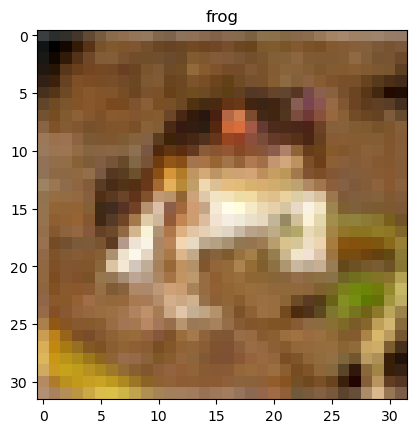

In [180]:
# Each batch contains 10,000 images
# 32 x 32 = 1024
# 32 x 32 x 3 = 3072
# print(len((dict[b'data'][0])))

print(np.array(dict[b'data'][0]))

first_image = np.array(dict[b'data'][0])

# Gives us label 6
first_image_label = np.array(dict[b'labels'][0])


print(first_image.shape)
first_image = first_image.reshape(3,32,32)
print(first_image.shape)
first_image = first_image.transpose(1,2,0)
print(first_image.shape)

plt.title(labels[first_image_label])
plt.imshow(first_image);


### Store all files